Accuracy of AdaBoost classifier with 10 estimators: 0.8182004299314157
Best n_estimators: 91
Best score: 0.8315204479844157
Accuracy of the tuned AdaBoost classifier on the test set: 0.8329409356126523


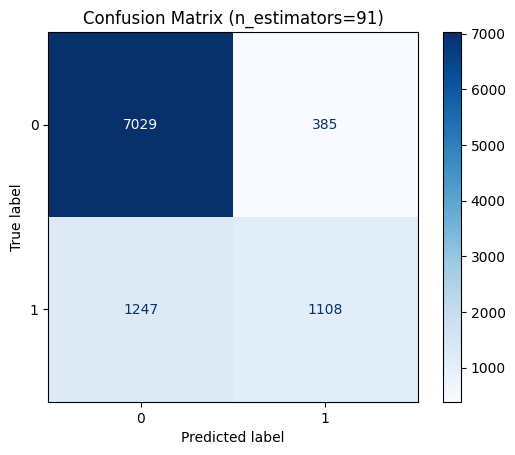


Best Accuracy: 0.8315 using 91 trees


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("/content/income.csv")  # Make sure this path matches your file location

# Split data into training and testing sets
X = df_scaled.drop('income_level', axis=1)
y = df_scaled['income_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=10)
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost classifier with 10 estimators: {accuracy}")

# Define the parameter grid
param_grid = {'n_estimators': range(1, 101, 5)}

# Create the AdaBoost classifier
ada_model = AdaBoostClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best n_estimators and best score
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best score: {best_score}")

from sklearn.metrics import accuracy_score

# Use the best estimator from the grid search
best_ada_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_ada_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the tuned AdaBoost classifier on the test set: {accuracy}")

# Predict using best model
# Use best_ada_model instead of ada_model
y_pred = best_ada_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_ada_model.classes_) # Use best_ada_model
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_ada_model.classes_) # Use best_ada_model
disp.plot(cmap="Blues")
# Use best_n_estimators instead of ada_n
plt.title(f"Confusion Matrix (n_estimators={best_n_estimators})")
plt.show()

# Use best_n_estimators instead of ada_n
print(f"\nBest Accuracy: {best_score:.4f} using {best_n_estimators} trees")